In [136]:
from IPython.display import display, Latex
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.special as sps
import scipy.integrate as spi
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 1. Reviewing the Background

The following are meant to be short problems, just to review key parts of the homogeneous expansion of the Universe. If not specified, assume a cosmology with $\Omega_{m,0} = 0.3$, $\Omega_{\Lambda,0} = 0.7$, and $h = 0.7$.

## Density Parameters

Calculate $\Omega_m$ and $\Omega_\Lambda$ at $z = 0.5$.

### *Solution:*

We'll need to use the relationship between scale factor and redshift:
\begin{align*}
    1 + z &= \frac{a_0}{a} \\
    &= \frac{1}{a},
\end{align*}
setting $a_0 = 1$. Let's next consider how the densities $\rho_m$, $\rho_\Lambda$ scale. $\rho_\Lambda$ does not have an depend explicitly on scale factor, meanwhile $\rho_m$ does:
\begin{align*}
    \rho_m &= \rho_{m,0}a^{-3} = \rho_{m,0}(1+z)^3, \\
    \rho_\Lambda &= \rho_{\Lambda,0}.
\end{align*}
let's write these in terms of $\Omega_m$, $\Omega_\Lambda$:
\begin{align*}
    \Omega_m &= \Omega_{m,0}(1+z)^3\frac{\rho_{c,0}}{\rho_c}, \\
    \Omega_\Lambda &= \Omega_{\Lambda,0}\frac{\rho_{c,0}}{\rho_c}.
\end{align*}
We can find $\rho_c$ starting from the definition and using the Friedmann Equation:
\begin{align*}
    \rho_c &= \frac{3H^2}{8\pi G} = \frac{3H_0^2}{8\pi G}\left[\Omega_{m,0}a^{-3} + \Omega_{\Lambda,0}\right], \\
    \frac{\rho_{c,0}}{\rho_c} &= \left[\Omega_{m,0}a^{-3} + \Omega_{\Lambda,0}\right]^{-1}.
\end{align*}
So now all quantities on the right hand side are known:
\begin{align*}
    \Omega_m &= \frac{\Omega_{m,0}(1+z)^3}{\Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0}} = 0.591, \\
    \Omega_\Lambda &= \frac{\Omega_{\Lambda,0}}{\Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0}} = 0.409.
\end{align*}
These values are consistent with the total energy density at $z = 0.5$ since they both sum to 1.

In [124]:
Omega_m0 = 0.3
Omega_L0 = 0.7
z = 0.5
Omega_m = Omega_m0*(1+z)**3/(Omega_m0*(1+z)**3 + Omega_L0)
Omega_L = Omega_L0/(Omega_m0*(1+z)**3 + Omega_L0)
Omega_m, Omega_L, Omega_m + Omega_L

## Luminosity and Angular Diameter distances

Make a plot of the luminosity and angular diameter distances as a function of redshift to $z = 10$. Compare these (on the same plot) to the luminosity/angular diameter distance for an $\Omega_{m,0} = 1$ universe.

Make sure to label your axes. Comment on the non-monotonicity of the angular diameter distance.

### *Solution:*

Let's start by finding the comoving distance. The formula is given as:
\begin{align*}
    \chi &= c\int_0^z\frac{dz}{H(z)}.
\end{align*}
Let's start with the easy case of a matter-only universe, for which we have:
\begin{align*}
    H(z) &= H_0(1+z)^{3/2}.
\end{align*}
The comoving distance can be solved analytically:
\begin{align*}
    \chi &= \frac{c}{H_0}\int_0^z\frac{dz}{(1+z)^{3/2}} \\
    &= 2D_H\left(1 - (1 + z)^{-1/2}\right),
\end{align*}
where $D_H$ is the Hubble distance. The luminosity distance is just:
\begin{align*}
    D_L &= (1+z)\chi \\
    &= 2D_H\left(1 - (1 + z)^{-1/2}\right)(1+z),
\end{align*}
while the angular diameter distance is:
\begin{align*}
    D_A &= \frac{\chi}{1+z} \\
    &= 2D_H\frac{1 - (1 + z)^{-1/2}}{1+z},
\end{align*}
Next for our own multicomponent universe. We have 
\begin{align*}
    H(z) &= H_0\sqrt{\Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0}}, \\
    \chi &= D_H\int_0^z\frac{dz}{\sqrt{\Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0}}}.
\end{align*}
We'll have to solve this numerically. Once we have that, we can just plug into the distance formulae:
\begin{align*}
    D_L &= (1+z)\chi, \\
    D_A &= \frac{\chi}{1+z}.
\end{align*}

In [59]:
# define parameters
z = np.linspace(0,10,1000)
Omega_m = 0.3
Omega_L = 0.7

# matter-only (analytic result)
DL_matter = 2*(1 - (1+z)**(-1/2))*(1+z)
DA_matter = 2*(1 - (1+z)**(-1/2))/(1+z)

# our universe (numeric result)
def integrand(z, Omega_m, Omega_L):
    return (Omega_m*(1+z)**3 + Omega_L)**(-1/2)

chi = np.array([spi.quad(integrand, 0, z[i], args=(Omega_m, Omega_L))[0] for i in range(len(z))])
DL = chi*(1+z)
DA = chi/(1+z)

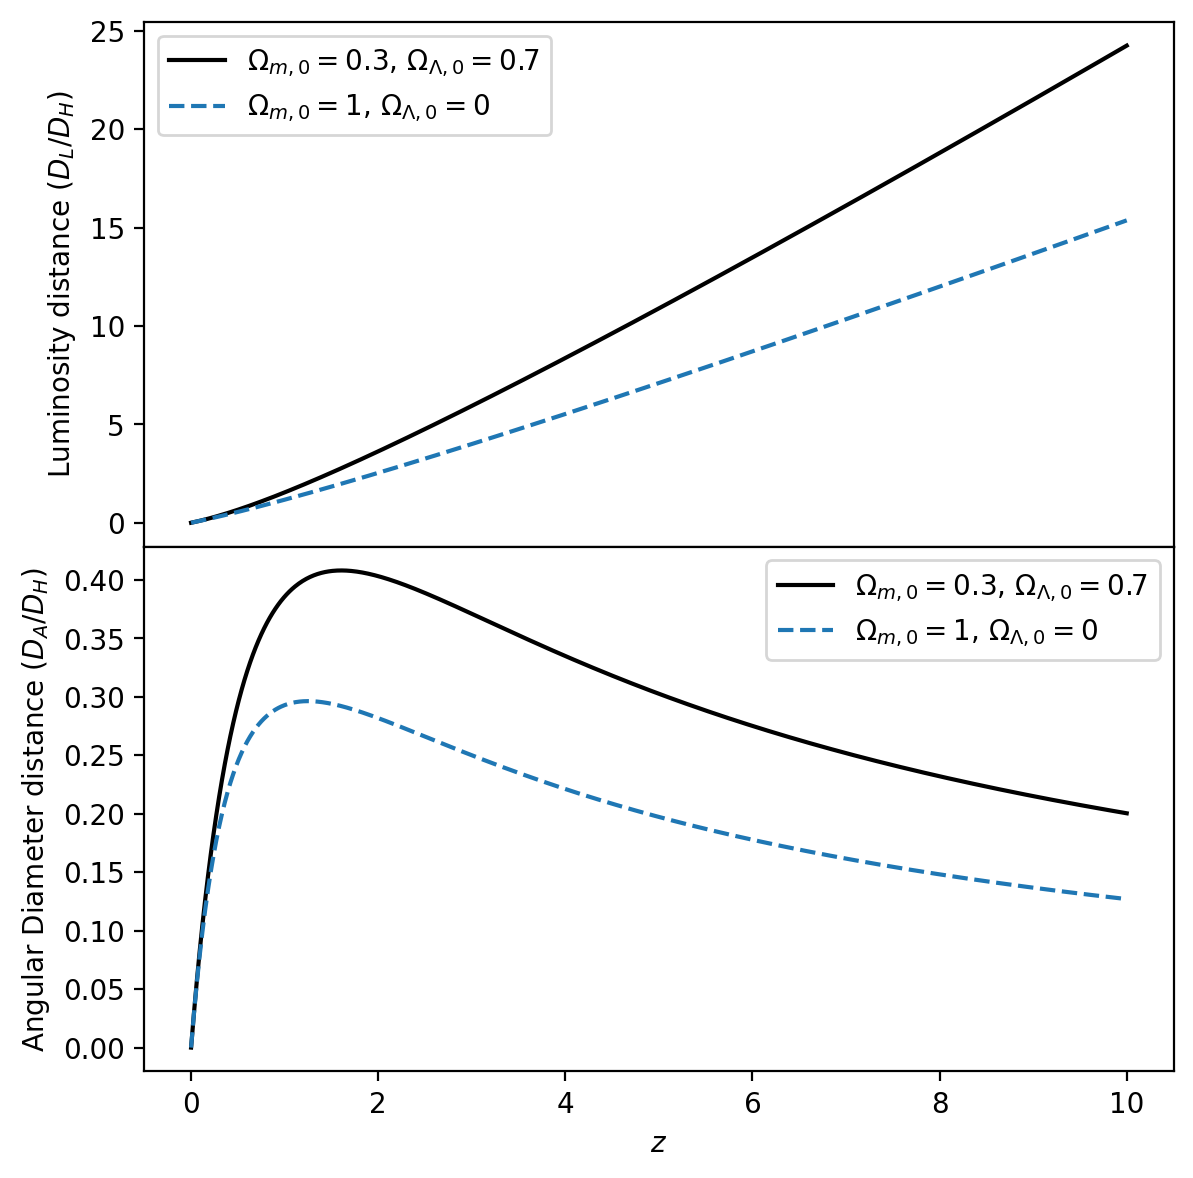

In [60]:
# make plots
fig, ax = plt.subplots(2,1,figsize=(6,6),sharex=True)#,dpi=300)
ax[0].plot(z, DL, '-k', label=r'$\Omega_{m,0} = 0.3$, $\Omega_{\Lambda,0} = 0.7$')
ax[0].plot(z, DL_matter, '--C0', label=r'$\Omega_{m,0} = 1$, $\Omega_{\Lambda,0} = 0$')
ax[0].set_ylabel(r'Luminosity distance ($D_L/D_H$)')
ax[0].legend()
ax[1].plot(z, DA, '-k', label=r'$\Omega_{m,0} = 0.3$, $\Omega_{\Lambda,0} = 0.7$')
ax[1].plot(z, DA_matter, '--C0', label=r'$\Omega_{m,0} = 1$, $\Omega_{\Lambda,0} = 0$')
ax[1].set_ylabel(r'Angular Diameter distance ($D_A/D_H$)')
ax[1].set_xlabel(r'$z$')
ax[1].legend()
fig.tight_layout()
fig.subplots_adjust(hspace=0)

The turnover in the angular diameter distance plot indicates that past $z \sim 1.5$, distant objects will weirdly begin to grow in size on the sky as we lookback further rather than shrink.

## Looking Back

At the colloquium last week, the speaker mentioned that a redshift of 2-3 roughly corresponds to 10 billion years ago. Find the redshift that is 10 billion years ago (three significant figures only).

### *Solution:*

The turnover in the angular diameter distance plot indicates that past $z \sim 1.5$, distant objects will weirdly begin to grow in size on the sky as we lookback further rather than shrink.

Let's now find what $z$ is as of 10 billion years ago. Let's use the Friedmann equation to solve for time:
\begin{align*}
    \frac{\dot{a}}{a} &= H_0\sqrt{\Omega_{m,0}a^{-3} + \Omega_{\Lambda,0}}, \\
    H_0dt &= \frac{da}{a\sqrt{\Omega_{m,0}a^{-3} + \Omega_{\Lambda,0}}}.
\end{align*}
Converting to an integral over redshift: $dz = -1/a^2da$, $da = -(1+z)^{-2}dz$:
\begin{align*}
    t(z) &= -\frac{1}{H_0}\int_0^z\frac{dz}{(1+z)\sqrt{\Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0}}}.
\end{align*}
Now let's solve this over a grid of $z$ values and find which values is closest to $t = 10$ Gyr.

In [123]:
# define parameters
h = 0.7
H0 = 100*h # km/s/Mpc
Mpc_per_km = 3.24078e-20 # Mpc/km
H0 *= Mpc_per_km # 1/s
Omega_m = 0.3
Omega_L = 0.7
s_per_yr = 60*60*24*365.25 # s/yr
z = np.linspace(0,10,50000)

# numerically integrate
def integrand(z, Omega_m, Omega_L):
    return 1/(1+z)/np.sqrt(Omega_m*(1+z)**3 + Omega_L)
# in Gyr:
t = np.array([spi.quad(integrand, 0, z[i], args=(Omega_m, Omega_L))[0] for i in range(len(z))])/H0/s_per_yr/1e9

# pick out t = 10 Gyr value
z10 = z[np.argmin(np.abs(t-10))]
z10

So $z = 1.856$ is the redshift that corresponds to $t = 10$ Gyr. As a check, we can see that lookback time correctly saturates as we approach high redshift.

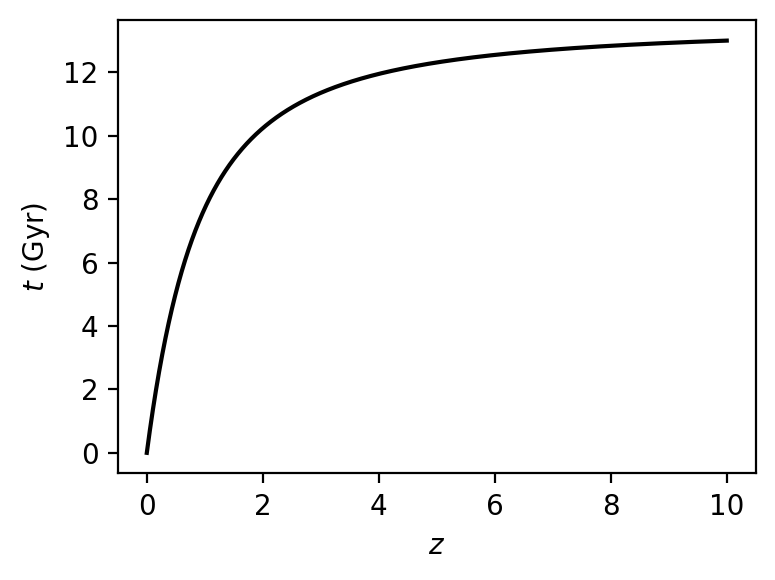

In [106]:
# plot
fig, ax = plt.subplots(figsize=(4,3))#,dpi=300)
ax.plot(z, t, '-k')
ax.set_ylabel(r'$t$ (Gyr)')
ax.set_xlabel(r'$z$')
fig.tight_layout()

## A $\Lambda$-dominated Universe

Consider a Universe with only a cosmological constant. Find $a(t)$. What is the age of such a Universe?

### *Solution:*

Solving the Friedmann equation with only the dark energy term:
\begin{align*}
    \left(\frac{\dot{a}}{a}\right)^2 &= \frac{\Lambda}{3}, \\
    \frac{\dot{a}}{a} &= \sqrt{\frac{\Lambda}{3}}, \\
    \int_{a_0}^a\frac{da}{a} &= \sqrt{\frac{\Lambda}{3}}\int_0^tdt, \\
    \ln\left(\frac{a}{a_0}\right) &= \sqrt{\frac{\Lambda}{3}}t, \\
    a(t) &= a_0e^{\sqrt{\frac{\Lambda}{3}}t}.
\end{align*}
It doesn't make sense to define an age for such a universe because the expansion history appears the exact same at every point in time.

# 2. Massive Neutrinos

Our current understanding of neutrino physics suggests that atleast two of the three neutrino species have a non-zero (although small) mass. Let us work out the cosmological implications of this.

Assuming that the neutrinos are relativistic at decoupling, show that the energy density at decoupling is given by:
\begin{align*}
    \rho_\nu &= \frac{T_\nu^4}{\pi^2}\int d\xi\frac{\xi^2\sqrt{\xi^2 + m_\nu^2/T_\nu^2}}{e^\xi +1},
\end{align*}
where $T_\nu$ is the neutrino temperature.

### *Solution:*

Let's start from the general form of the energy density:
\begin{align*}
    \rho &= \frac{g}{(2\pi)^3}\int d^3pf(p,t)E(p).
\end{align*}
Let's assume $g = 2$ to account for two different spins for one of the neutrino species (which we'll assume could be distinguished from the others due to their masses). Since they are fermions $f(p,t)$ is the Fermi-Dirac distribution:
\begin{align*}
    f(p,t) &= \frac{1}{e^{(E-\mu)/T} + 1}.
\end{align*}
We'll set $\mu_\nu \approx 0$ since we are still radiation dominated at the time of decoupling. We now need to use a fully relativistic treatment of the particles, accounting also for contributions due to the mass of the particles (using $c = 1$):
\begin{align*}
    E^2 &= p^2 + m_\nu^2, \\
    E &= \sqrt{p^2 + m_\nu^2}
\end{align*}
We can also substitute $d^3p = 4\pi p^2dp$. Putting it all together:
\begin{align*}
    \rho_\nu &= \frac{1}{\pi^2}\int dp\frac{p^2\sqrt{p^2 + m_\nu^2}}{e^{\sqrt{p^2 + m_\nu^2}/T_\nu} + 1}.
\end{align*}
Now let's just make the substitution $\xi = p/T_\nu$:
\begin{align*}
    \rho_\nu &= \frac{T_\nu^4}{\pi^2}\int d\xi\frac{\xi^2\sqrt{\xi^2 + m_\nu^2/T_\nu^2}}{e^{\sqrt{\xi^2 + m_\nu^2/T_\nu^2}} + 1}.
\end{align*}
This looks almost like the original form, however I still have an extra term in the exponent in the denominator. It's possible that only the numerator matters to leading order in $m_\nu/T_\nu$, however I was not able to prove this to myself by performing a series expansion.

----------------

Consider a series expansion for small $m_\nu/T_\nu$ and show that:
\begin{align*}
    \rho_\nu \approx \rho_{\nu,0}\left(1 + \frac{5}{7\pi^2}\frac{m_\nu^2}{T_\nu^2}\right),
\end{align*}
where $\rho_{\nu,0}$ is the energy density of massless neutrinos.

### *Solution:*

Let's define $x = m_\nu/T_\nu$ and then start from the correct version of the energy density:
\begin{align*}
    \rho_\nu &= \frac{T_\nu^4}{\pi^2}\int d\xi\frac{\xi^2\sqrt{\xi^2 + x^2}}{e^\xi +1}.
\end{align*}
The expansion is:
\begin{align*}
    \sqrt{\xi^2 + x^2} &\approx \xi + \left.\frac{d}{dx}\sqrt{\xi^2 + x^2}\right|_{x=0}x + \left.\frac{1}{2}\frac{d^2}{dx^2}\sqrt{\xi^2 + x^2}\right|_{x=0}x^2 \\
    &\approx \xi + \left.\frac{x}{\sqrt{\xi^2 + x^2}}\right|_{x=0}x + \frac{1}{2}\left.\frac{d}{dx}\frac{x}{\sqrt{\xi^2 + x^2}}\right|_{x=0}x^2 \\
    &\approx \xi + \frac{1}{2}\left(\frac{1}{\sqrt{\xi^2 + x^2}} - \frac{x^2}{(\xi^2 + x^2)^{3/2}}\right)_{x=0}x^2 \\
    &\approx \xi + \frac{1}{2\xi}x^2.
\end{align*}
The integrand can now be separated into two terms, noting that the first one is equivalent to the energy density of massless neutrinos (it's also correct based on our expression for the energy density of relativistic fermions from class):
\begin{align*}
    \rho_\nu &\approx \frac{T_\nu^4}{\pi^2}\int d\xi\frac{\xi^3}{e^\xi +1} + \frac{T_\nu^2m_\nu^2}{2\pi^2}\int d\xi\frac{\xi}{e^\xi +1} \\
    &\approx \frac{7\pi^2}{120}T_\nu^4 + \frac{1}{24}T_\nu^2m_\nu^2 \\
    &\approx \frac{7\pi^2}{120}T_\nu^4 + \left(\frac{7\pi^2}{120}T_\nu^4\right)\frac{5}{7\pi^2}\frac{m_\nu^2}{T_\nu^2} \\
    &\approx \rho_{\nu,0}\left(1 + \frac{5}{7\pi^2}\frac{m_\nu^2}{T_\nu^2}\right).
\end{align*}

---------------

If $\rho_\nu$ is "significantly" larger than $\rho_{\nu,0}$ at the epoch of the CMB ($z \sim 1000$), then the neutrinos can affect the CMB. Estimate the smallest neutrino mass detectable in the CMB. Feel free to make assumptions to do this, but explicitly describe these. You may assume that the CMB temperature today is 0.235 meV.

### *Solution:*

Massive neutrinos will most likely look just like massless neutrinos so long as they are relativistic and follow the relativistic Fermi-Dirac distribution. However they could affect the CMB if the massive neutrinos become nonrelativistic early enough. Specifically, we will assume that the massive neutrinos must become nonrelativistic before last scattering in order to affect the CMB in any way. To estimate the point when the neutrinos become nonrelativistic, let's estimate $\langle p_\nu\rangle$ and set it equal to $m_\nu$:
\begin{align*}
    m_\nu &= \langle p_\nu\rangle.
\end{align*}
Need to have a ratio of Fermi-Dirac integrals to solve for $\langle p_\nu\rangle$ because it's not a density. We'll assume the relativistic Fermi-Dirac distribution is still a good approximation at this time:
\begin{align*}
    m_\nu &= \frac{\int d^3pf(p,t)p}{\int d^3pf(p,t)} \\
    &= \frac{\int dp(e^{p/T_\nu} + 1)^{-1}p^3}{\int dp(e^{p/T_\nu} + 1)^{-1}p^2} \\
    &= T_\nu\frac{\int d\xi(e^\xi + 1)^{-1}\xi^3}{\int d\xi(e^\xi + 1)^{-1}\xi^2} \\
    &= \left(\frac{7\pi^4}{120}\right)\left(\frac{2}{3\zeta(3)}\right)T_\nu \\
    &= \left(\frac{7\pi^4}{180\zeta(3)}\right)T_\nu.
\end{align*}
The neutrino background temperature is shifted from the CMB background temperature due to electron-positron annihilation:
\begin{align*}
    T_\nu &= \left(\frac{4}{11}\right)^{1/3}T_\gamma,
\end{align*}
and the temperature also evolves over redshift:
\begin{align*}
    T_\gamma &= (1+z)T_{\gamma,z=0},
\end{align*}
So we have the minimum mass detectable by the CMB:
\begin{align*}
    m_\nu &= \left(\frac{7\pi^4}{180\zeta(3)}\right)\left(\frac{4}{11}\right)^{1/3}(1+z)T_{\gamma,z=0}.
\end{align*}

In [302]:
z = 1000 # z for last scattering
T = 0.235 # meV
7*np.pi**4/180/sps.zeta(3)*(4/11)**(1/3)*(1+z)*T

$m_\nu = 0.53$ eV is the same order of magnitude albeit a bit higher than present CMB limits on the neutrino mass, so this result seems reasonable.

---------

Assume that one of the neutrino species has a mass of $m_\nu$. Estimate the redshift at which the neutrinos go non-relativistic.

### *Solution:*

We can just rewrite our previous result and isolate redshift $z$:
\begin{align*}
    m_\nu &= \left(\frac{7\pi^4}{180\zeta(3)}\right)\left(\frac{4}{11}\right)^{1/3}(1+z)T_{\gamma,z=0}, \\
    z &= \left(\frac{180\zeta(3)}{7\pi^4}\right)\left(\frac{11}{4}\right)^{1/3}\frac{m_\nu}{T_{\gamma,z=0}} - 1, \\
\end{align*}
If the mass is small enough, then it will be that $z < 0$, in which case massive neutrinos would still be relativistic today.

-------

Estimate the number density of neutrinos today. To do so, you can’t just use the non-relativistic integrals from class, since the neutrinos are not in thermal equilibrium anymore. Instead, calculate the number density at neutrino decoupling, and then dilute the density with the expansion of the Universe.

### *Solution:*

Let's solve for the number density at neutrino decoupling (using $g = 2$):
\begin{align*}
    n_\nu &= \frac{g}{(2\pi)^3}\int d^3pf(p,t) \\
    &= \frac{1}{\pi^2}\int dp\frac{p^2}{e^{p/T} + 1} \\
    &= \frac{T_\nu^3}{\pi^2}\int d\xi\frac{\xi^2}{e^\xi + 1} \\
    &= \frac{3\zeta(3)}{2\pi^2}T_\nu^3.
\end{align*}
We'll scale this result with the universe's expansion:
\begin{align*}
    n_{\nu,z=0} &= \frac{3\zeta(3)}{2\pi^2}T_{\nu,z=0}^3.
\end{align*}
We'll also convert the neutrino temperature to the CMB temperature:
\begin{align*}
    n_{\nu,z=0} &= \frac{3\zeta(3)}{2\pi^2}\left(\frac{4}{11}\right)T_{\gamma,z=0}^3, \\
    &= \frac{6\zeta(3)}{11\pi^2}T_{\gamma,z=0}^3.
\end{align*}
$T_{\gamma,z=0}$ has units of energy, so to convert $n_{\nu,z=0}$ to units of particles/cm$^3$ we'll need to insert our factors of $\hbar$ and $c$:
\begin{align*}
    n_{\nu,z=0} &= \frac{6\zeta(3)}{11\pi^2}\left(\frac{T_{\gamma,z=0}}{\hbar c}\right)^3.
\end{align*}
This nets the result $n_\nu = 112$ particle/cm$^3$.

In [322]:
T = 2.35e-4 # eV
hbar = 6.58e-16 # eV*s
c = 3e10 # cm/s
k = 8.62e-5 # eV/K
n = 6*sps.zeta(3)/11/np.pi**2*(T/hbar/c)**3
n

Show that these neutrinos have a energy density today of:
\begin{align*}
    \Omega_{\nu,{z=0}}h^2 &= \frac{m_\nu}{94\text{ eV}}.
\end{align*}

### *Solution:* (Need to fix to use previous energy density calculations)

Energy density:
\begin{align*}
    \Omega_{\nu,z=0} &= \frac{\rho_{\nu,z=0}}{\rho_{c,0}}.
\end{align*}
If the energy density is dominated by massive neutrinos at present, then $\rho_{\nu,z=0} = m_\nu n_{\nu,0}$:
\begin{align*}
    \Omega_{\nu,z=0} &= \frac{m_\nu n_{\nu,0}}{\rho_{c,0}} \\
    \frac{\Omega_{\nu,z=0}h^2}{m_\nu} &= \frac{n_{\nu,0}h^2}{\rho_{c,0}}.
\end{align*}
From Baumann: $\rho_{c,0} = 1.9\times10^{-32} h^2$ kg cm$^{-3}$. We'll divide this by a factor of $c^2$ to get the correct units of eV$^{-1}$:
\begin{align*}
    \frac{\Omega_{\nu,z=0}h^2}{m_\nu} &= \frac{n_{\nu,0}h^2}{\rho_{c,0}c^2}.
\end{align*}
We can now calculate this term on this right:

In [325]:
# n was found above, in units of cm^-3
rho_crit = 1.9e-32 # kg/cm^-3
c = 3e8 # m/s
J_per_eV = 1.60218e-19 # J/eV
rhs = n/rho_crit/c**2*J_per_eV
1/rhs

This factor gives us almost exactly what we are trying to show:
\begin{align*}
    \Omega_{\nu,z=0}h^2 &= \frac{m_\nu}{94\text{ eV}}.
\end{align*}

# Measuring the Expansion History with Standard Candles

You are encouraged to use Mathematica or something similar to simplify/assist with the algebra in this problem, if you want. If/when you need to, assume the standard values of the cosmological parameters from the first problem.

Suppose that the standard candle method directly measures the radial comoving distance:
\begin{align*}
    \chi &= \int dz\frac{c}{H_0\left[\Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0} + (1 - \Omega_{m,0} - \Omega_{\Lambda,0})(1+z)^2\right]^{1/2}}.
\end{align*}

Develop a series expansion of $\chi$ as a function of $z$ expanding about $z = 0$. Work to order $z^3$ (i.e. include those terms).

### *Solution:*

I will use `sympy` to help with algebra here. We'll keep only up to $z^2$ when expanding the integrand since it will translate to order $z^3$ after integrating.

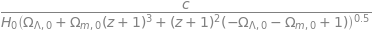

In [199]:
chi, c, H0, z, Omega_m, Omega_L = sp.symbols('chi c H_0 z Omega_m_\,_0 Omega_Lambda_\,_0')
integrand = c/H0/(Omega_m*(1+z)**3 + Omega_L + (1 - Omega_m - Omega_L)*(1+z)**2)**(1/2)
integrand

In [200]:
series = sp.series(integrand, x=z, x0=0, n=3)
series

In [205]:
solution = sp.integrate(sp.series(integrand, x=z, x0=0, n=3), (z, 0, z))
solution

Using the values for our universe $\Omega_{m,0} = 0.3$, $\Omega_{\Lambda,0} = 0.7$:

In [208]:
sp.simplify(solution.subs({Omega_m:0.3, Omega_L: 0.7}), rational=True)

To what redshift is this expansion accurate to 10%?

### *Solution:*

We'll need to numerically evaluate the original solution and then compare with this approximation for a bunch of z values to find when they are different by 10%. We'll put $\chi$ in units of $c/H_0$, which lets us set $c = H_0 = 1$.

In [270]:
# define parameters
Omega_m = 0.3
Omega_L = 0.7
z = np.linspace(0.001,2,10000)

# numerical result (exact)
def integrand(z, Omega_m, Omega_L):
    return 1/np.sqrt(Omega_m*(1+z)**3 + Omega_L + (1 - Omega_m - Omega_L)*(1+z)**2)
chi = np.array([spi.quad(integrand, 0, z1, args=(Omega_m, Omega_L))[0] for z1 in z])

# approximate result
chi_approx = z*(800 - 180*z - 39*z**2)/800

# find percent difference
p_diff = (chi_approx - chi)/chi
z_p10 = z[np.argmin(np.abs(p_diff + 0.1))]
print(z_p10)

1.2043184318431843


So the answer is $z = 1.2$ after rounding. Here's how the solutions diverge:

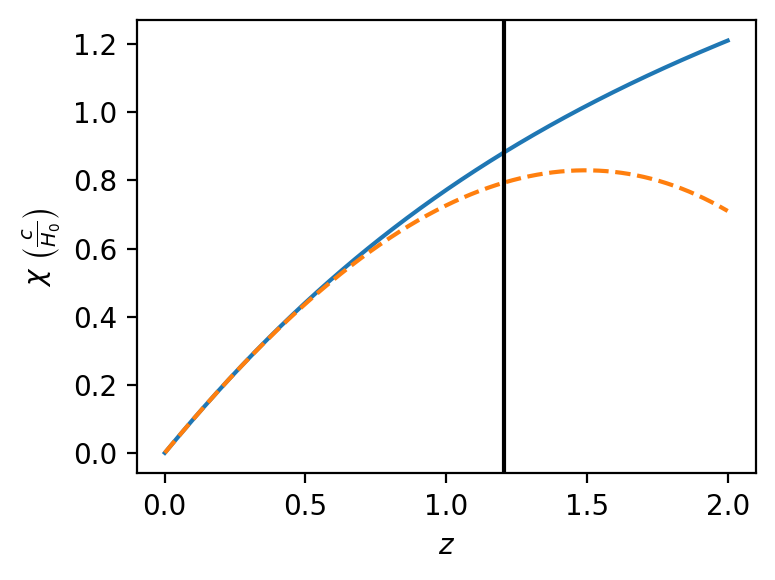

In [273]:
# plot
fig, ax = plt.subplots(figsize=(4,3))#,dpi=300)
ax.plot(z, chi, '-C0')
ax.plot(z, chi_approx, '--C1')
ax.set_ylabel(r'$\chi$ $\left(\frac{c}{H_0}\right)$')
ax.set_xlabel(r'$z$')
ax.axvline(z_p10, color='k')
fig.tight_layout()

Explain the following statement - for very low redshift measurements, the only parameter that can be measured is $H_0$.

### *Solution:*

Viewing the above plot, the linear term is dominating the behavior of $\chi$ at low redshift. At high redshift, certainly by $z = 1.2$, the effect of the next term in the series, the quadratic term, has become noticeable (although this also depends on how precisely $\chi$ has been measured). Referencing our expanded solution:

In [210]:
solution

We see that the linear term includes only the $H_0$ parameter, while the remaining parameters $\Omega_{m,0}$ and $\Omega_{\Lambda,0}$ only show up in the nonlinear terms. Therefore, since only the linear term matters at low redshift, $H_0$ is the only parameter that can be measured at low redshift.

------------

As you increase the redshift reach (still low redshifts), you gain sensitivity to the other cosmological parameters. However, it turns out that you are largely sensitive to a combination of $\Omega_{m,0}$ and $\Omega_{\Lambda,0}$, and not both individually. What combination and why?

### *Solution:*

The next term we will be sensitive to after the linear term is the quadratic term, i.e. there will be some redshift regime over which we can detect the quadratic trend in $\chi$ but not the cubic trend. In this regime, we can only fit a slope parameter (determined by $H_0$) and a single parameter for the strength of the quadratic trend. Referencing the above equation, we see that the combination $\Omega_{\Lambda,0} + \Omega_{m,0}/2$ determines the strength of the quadratic. So, we are sensitive to this combination but not both terms individually until a cubic trend can be distinguished.

-----------

Consider a survey that measures $\chi$ to $1\%$ at $z = 0.01$, $0.1$, $0.2$, $0.3$. Forecast the errors on $H_0$, $\Omega_{m,0}$ and $\Omega_{\Lambda,0}$.

### *Solution:*

First we'll define our mean model $\mu = \mu(\Omega_{m,0}, \Omega_{\Lambda,0}, H_0, z)$. Since for all redshifts $z = 0.01$, $0.1$, $0.2$, $0.3$, we are within the regime $z < 1$ we can safely use the series expansion for $\chi$.

In [392]:
c, H0, z, Omega_m, Omega_L = sp.symbols('c H_0 z Omega_m_\,_0 Omega_Lambda_\,_0')
chi = solution.removeO()
chi

Since we are given *relative* error rather than the *absolute* error on each $\chi$ measurement (I'll define the relative error as $p = 0.01$), the covariance matrix $\mathbf{C}$ will not be trivial, as the strength of the absolute error depends on the value of $\chi$ and hence the parameters $\Omega_{m,0}, \Omega_{\Lambda,0}, H_0$. We'll define it as $\mathbf{C} = \sigma^2\mathbf{I}$ where $\sigma^2 = p^2\chi(z)^2$ and $\mathbf{I}$ is the identity matrix. Fortunately since this is diagonal, the inverse is just $\mathbf{C}^{-1} = \sigma^{-2}\mathbf{I} = p^{-2}\chi^{-2}\mathbf{I}$. For a Gaussian likelihood, the Fisher matrix is defined:
\begin{align*}
    F_{ij} = \mu_{,i}\mathbf{C}^{-1}\mu_{,j} + \text{Tr}[\mathbf{C}^{-1}_{,i}\mathbf{C}^{-1}\mathbf{C}^{-1}_{,j}].
\end{align*}
The derivatives will be $\mu_{,i} = \chi_{,i}$ and $\mathbf{C}_{,i}^{-1} = -2p^{-4}\chi^{-3}\chi_{,i}\mathbf{I}$. In terms of $\chi$, the first term is:
\begin{align*}
    \mu_{,i}\mathbf{C}^{-1}\mu_{,j} &= p^{-2}\sum_z\chi^{-2}\chi_{,i}\chi_{,j}.
\end{align*}
The trace term will come out to:
\begin{align*}
    \text{Tr}[\mathbf{C}^{-1}_{,i}\mathbf{C}^{-1}\mathbf{C}^{-1}_{,j}] &= \text{Tr}[-2p^{-4}\chi^{-3}\chi_{,i}\mathbf{I}p^{-2}\chi^{-2}\mathbf{I}(-2)p^{-4}\chi^{-3}\chi_{,j}\mathbf{I}] \\
    &= 4p^{-10}\sum_{z}\chi^{-8}\chi_{,i}\chi_{,j},
\end{align*}
so our Fisher matrix is:
\begin{align*}
    F_{ij} &= p^{-2}\sum_{z}\left[\left(\chi^{-2} + 4p^{-8}\chi^{-8}\right)\chi_{,i}\chi_{,j}\right].
\end{align*}
The total $3\times3$ matrix we can write out as:
\begin{align*}
    \mathbf{F} &=
    p^{-2}\sum_{z}\left[\left(\chi^{-2} + 4p^{-8}\chi^{-8}\right)
    \begin{pmatrix}
        \chi_{,H_0}^2 & \chi_{,H_0}\chi_{,\Omega_m} & \chi_{,H_0}\chi_{,\Omega_\Lambda} \\
        \chi_{,\Omega_m}\chi_{,H_0} & \chi_{,\Omega_m}^2 & \chi_{,\Omega_m}\chi_{,\Omega_\Lambda} \\
        \chi_{,\Omega_\Lambda}\chi_{,H_0} & \chi_{,\Omega_\Lambda}\chi_{,\Omega_m} & \chi_{,\Omega_\Lambda}^2 \\
    \end{pmatrix}\right].
\end{align*}
Finally, we'll get the variances from the inverse of the Fisher matrix, assuming we saturate the Cramer-Rao bound:
\begin{align*}
    \sigma_{ii}^2 = (F^{-1})_{ii}.
\end{align*}
We'll need to insert values for $H_0$, $\Omega_m$, and $\Omega_\Lambda$ (our "fiducial model") before we can take the inverse.

In [394]:
# define derivatives
chi_H0 = sp.diff(chi, H0)
chi_Omega_m = sp.diff(chi, Omega_m)
chi_Omega_L = sp.diff(chi, Omega_L)
chi_derivs = [chi_H0, chi_Omega_m, chi_Omega_L]

# define values
z_arr = np.array([0.01, 0.1, 0.2, 0.3])
p = 0.01
c_val = 3e5 # km/s

# define fiducial model
h = 0.7
H0_val = 100*h # km/s/Mpc
Omega_m_val = 0.3
Omega_L_val = 0.7

# create and solve Fisher matrix elements
F = np.zeros((3,3))
prefac = p**(-2)*(chi**(-2) + 4*(p*chi)**(-8))
for i in range(3):
    for j in range(3):
        Fij = 0
        expr = prefac*chi_derivs[i]*chi_derivs[j]
        for z_val in z_arr:
            Fij += expr.subs({c:c_val, H0: H0_val, Omega_L: Omega_L_val, Omega_m: Omega_m_val, z:z_val})
        F[i,j] = float(Fij)

# invert Fisher matrix
var = npl.inv(F)

# read off expected errors
[np.sqrt(var[i,i]) for i in range(3)]

So we have the final error estimates:
\begin{align*}
    \sigma_{H_0} &= 0.0394\text{ km/s/Mpc} \\
    \sigma_{\Omega_{m,0}} &= 0.857 \\
    \sigma_{\Omega_{\Lambda,0}} &= 0.537.
\end{align*}
These actually make a lot of sense: $H_0$ should be estimated reasonably well whereas $\Omega_{m,0}$ and $\Omega_{\Lambda,0}$ have a fairly large variance. Maybe $\Omega_{\Lambda,0}$ is slightly more constrained than $\Omega_{m,0}$ because $\Omega_{\Lambda,0}$ is more significant than $\Omega_{m,0}$ in our fiducial model?

As an additional check, we also see the covariance term between $\Omega_{m,0}$ and $\Omega_{\Lambda,0}$ is fairly significant, as expected.

In [395]:
var[1,2]